In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [258]:
df = pd.read_csv('train.csv', usecols=['Age','Fare' ])
df1 = pd.read_csv('train.csv')

df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [259]:
d = df1.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId']) 
d.fillna(df['Age'].mean(), inplace=True)
d.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [260]:
X = d.iloc[:, 1:]
y = d.iloc[:, :1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
887,1,female,19.0,0,0,30.0000,S
416,2,female,34.0,1,1,32.5000,S
479,3,female,2.0,0,1,12.2875,S
134,2,male,25.0,0,0,13.0000,S
588,3,male,22.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
400,3,male,39.0,0,0,7.9250,S
118,1,male,24.0,0,1,247.5208,C
701,1,male,35.0,0,0,26.2875,S
206,3,male,32.0,1,0,15.8500,S


In [261]:
trf = ColumnTransformer(transformers= [('trf', OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first'),['Sex']),
                                      ('trf1', SimpleImputer(strategy='most_frequent'),  ['Embarked'])],
                                      
                        remainder='passthrough')
# trf = ColumnTransformer([('trf', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [0])], remainder='passthrough')

In [262]:
X_train1 = pd.DataFrame(trf.fit_transform(X_train))
X_test1 = pd.DataFrame(trf.fit_transform(X_test))
X_train1[1].value_counts()

1
S            509
C            139
Q             62
29.699118      2
Name: count, dtype: int64

In [236]:
lr = LinearRegression()
lr.fit(X_train1, y_train)
y_pred = lr.predict(X_test1)

print("the normal is " , r2_score(y_test, y_pred))
print("the mean is  ", np.mean(cross_val_score(lr, X_train_transform,y_train,scoring='r2' )))


ValueError: could not convert string to float: 'S'

In [113]:
df.fillna(df['Age'].mean())

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [85]:
sns.heatmap(df1.corr(), annot=True)

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Axes: xlabel='Age', ylabel='Fare'>

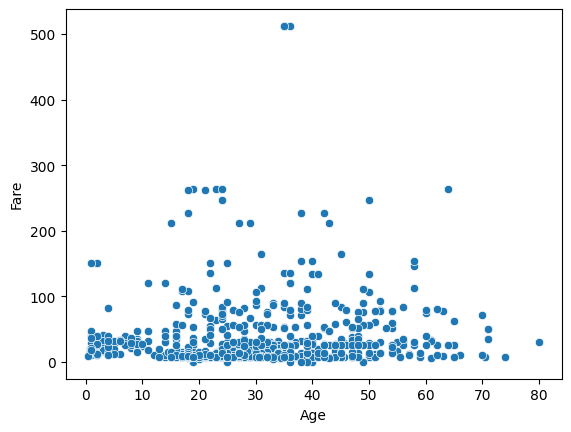

In [73]:
sns.scatterplot(x=df['Age'], y=df['Fare'])


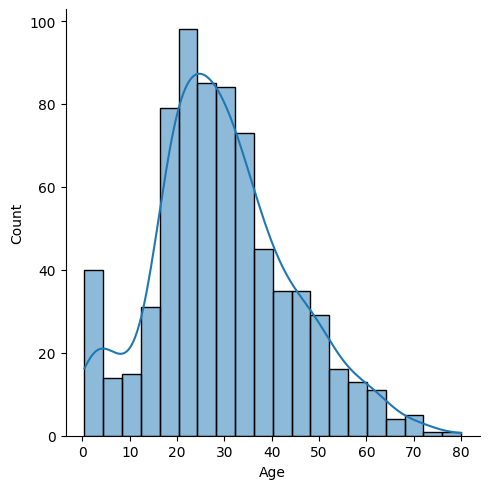

In [76]:
sns.displot(df['Age'], kde = True)

<Axes: xlabel='Age', ylabel='Density'>

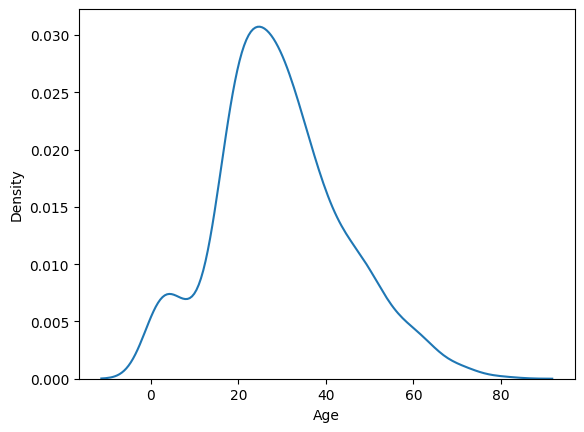

In [78]:
sns.kdeplot(df['Age'])

In [81]:
# X = df.iloc[:, 0:4]
# y = df.iloc[:, -1]
a = 
X_train, X_test, y_train, y_test = train_test_split(df['Age'],df['Fare'], test_size=0.2, random_state=5)

In [186]:
# trf = ColumnTransformer([('trf', OneHotEncoder( sparse_output=False, handle_unknown='ignore'), [0])], remainder='passthrough')
# X_train_transform = trf.fit_transform(X_train)
# X_test_transform = trf.fit_transform(X_test)


In [82]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("the normal is " , r2_score(y_test, y_pred))
print("the mean is  ", np.mean(cross_val_score(lr, X_train_transform,y_train,scoring='r2' )))


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.